# Natural Language Processing Project<a class="anchor" id="top"></a>
## Team Members
[Bethany Thompson](https://github.com/ThompsonBethany01) & [Bibek Mainali](https://github.com/MainaliB)
## Goals 
Predict a repository coding language by it's readme file.
- Acquire data on GitHub's trending repositories
- Clean data by normalizing any text
- Explore trends in text within each coding language
- Create a classification model to predict the coding language

## Conclusions
- Trends:
- Model Metrics:

## Reproduction Requirements
### Files
In your working directory, download:
- Data_Analysis.ipynb
- Acquire.py
- Prepare.py  

Tools:
- Python Version
- Pandas Version
- Other Versions

## Table of Contents
1. [Acquisition](#first-bullet)
2. [Preparation](#second-bullet)
3. [Exploration](#third-bullet)
4. [Modeling](#fourth-bullet)
5. [Final Conclusions](#fifth-bullet)

# Acquisition <a class="anchor" id="first-bullet"></a>
For this project, we have to build the dataset. We decided on a list of GitHub repositories to scrape, and wrote the python code necessary to extract the text of the README file for each page, and the primary language of the repository.

To can find the language of a repository:
1. Visit Main Page of Repo
1. Locate Bottom Right Side of Repo stating **Languages** 
2. html code ```<ul class="list-style-none">```

The only requirement is to include at least 100 repositories in our data set.

## Repositories Chosen
- GitHub's Trending English Repositories - At Least 25 from Top 4 Most Popular Coding Languages
     - Python
     - Java
     - Swift
     - Something Else


In [1]:
# Acquire Imports
import pandas as pd
import numpy as np
from requests import get
from bs4 import BeautifulSoup
import os

# Acquire.py Module
import Acquire

## Acquire.get_top_repo Function
- Scrapes repository names from the trending GitHub repo page, acquiring 25 from each coding language filter of Python, Java, Javescript, and Swift
- creates url from repo name user/repo_name

In [73]:
df = pd.read_csv('train_validate.csv')

In [74]:
# urls = Acquire.get_top_repo(['python','java','javascript','swift'],'daily')

In [75]:
df.link.head()

0               https://github.com/ytdl-org/youtube-dl
1    https://github.com/PyTorchLightning/pytorch-li...
2          https://github.com/microsoft/restler-fuzzer
3              https://github.com/bridgecrewio/checkov
4                   https://github.com/jiupinjia/SkyAR
Name: link, dtype: object

In [76]:
# no repeat urls present
df.link.value_counts()[df.link.value_counts() > 1]

Series([], Name: link, dtype: int64)

In [77]:
# expected amount of coding languages
df.language.value_counts()

swift         25
python        25
java          25
javascript    25
Name: language, dtype: int64

## Acquire.get_content_df Function

In [6]:
# code ran once for acquire and prep, final df saved to csv after prepare
# df = Acquire.get_content_df(urls['link'])

In [7]:
# df

### Takeaways
Our df includes:
- content as Readme file text
- watchers as number of users watching the repo
- stars as number of users that have starred the repo
- forks as number of users that have forked the repo

Next steps:
1. clean the text file
2. convert counts from strings to integeres, i.e. 1.5k to 1500

##### [Back to Top](#top)

# Preparation <a class="anchor" id="second-bullet"></a>
Within the Prepare.py function:
- readme file text is normalized using Natural Language Processing
- string numbers are converted to integers using pandas

In [8]:
import Prepare

In [9]:
# df = Prepare.prepare_df(df)

In [10]:
# df = df.merge(urls, left_on=df.index, right_on=urls.index).drop('key_0', axis=1)

In [11]:
# will work with this df from now up to testing the final model chosen
# will generate new data later to evaluate the final model on test
# df.to_csv('train_validate.csv')

In [13]:
df.head()

,content,watchers,stars,forks,clean,tokenized,stemmed,lemmatized,filtered,word_list,char_length,word_length,language,link
0,\nyoutube-dl - download videos from youtube.co...,2100,79900,1600,youtubedl download videos from youtubecom or ...,youtubedl download videos from youtubecom or o...,youtubedl download video from youtubecom or ot...,youtubedl download video from youtubecom or ot...,youtubedl download video youtubecom video plat...,"['youtubedl', 'download', 'video', 'from', 'yo...",69485,10608,python,https://github.com/ytdl-org/youtube-dl
1,\n\nThe lightweight PyTorch wrapper for high-p...,215,10300,1200,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,the lightweight pytorch wrapper for highperfor...,lightweight pytorch wrapper highperformance ai...,"['the', 'lightweight', 'pytorch', 'wrapper', '...",6884,860,python,https://github.com/PyTorchLightning/pytorch-li...
2,RESTler\nWhat is RESTler?\nRESTler is the firs...,9,111,9,restlerwhat is restlerrestler is the first sta...,restlerwhat is restlerrestler is the first sta...,restlerwhat is restlerrestl is the first state...,restlerwhat is restlerrestler is the first sta...,restlerwhat restlerrestler first stateful rest...,"['restlerwhat', 'is', 'restlerrestler', 'is', ...",6419,944,python,https://github.com/microsoft/restler-fuzzer
3,\n\n\n\n\n\n\n\n\n\n\nCheckov is a static code...,41,1600,162,checkov is a static code analysis tool for inf...,checkov is a static code analysis tool for inf...,checkov is a static code analysi tool for infr...,checkov is a static code analysis tool for inf...,checkov static code analysis tool infrastructu...,"['checkov', 'is', 'a', 'static', 'code', 'anal...",5492,706,python,https://github.com/bridgecrewio/checkov
4,SkyAR\nPreprint | Project Page | Google Colab\...,42,1200,121,skyarpreprint project page google colaboffic...,skyarpreprint project page google colabofficia...,skyarpreprint project page googl colaboffici p...,skyarpreprint project page google colabofficia...,skyarpreprint project page google colabofficia...,"['skyarpreprint', 'project', 'page', 'google',...",4194,607,python,https://github.com/jiupinjia/SkyAR


### Takeaways
Conclusions:  
Next Steps:

##### [Back to Top](#top)

# Exploration <a class="anchor" id="third-bullet"></a>
### Before splitting the df, we can do univariate exploration:
   - distributions of single variables
   - determine if outliers are present - are they okay in the context or need to be removed?  


### Split the data into train and validate for bivariate analysis
   - What are the most common words in READMEs?
   - What does the distribution of IDFs look like for the most common words?
   - Does the length of the README vary by programming language?
   - Do different programming languages use a different number of unique words?
   - What words are present only within the specific coding languages?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize = [13,9])
from wordcloud import WordCloud

import nltk
import re

## Univariate Analysis Before Splitting the DF

In [15]:
df.describe()

,watchers,stars,forks,char_length,word_length
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,485.620000,11943.350000,2350.510000,7984.990000,1110.620000
std,838.186532,15891.390092,4317.312778,19276.827503,2843.398077
min,9.000000,24.000000,9.000000,63.000000,8.000000
25%,69.000000,1400.000000,208.500000,1968.750000,259.250000
50%,247.500000,6150.000000,894.500000,3947.500000,505.500000
75%,551.750000,17375.000000,1900.000000,6875.750000,929.000000
max,6800.000000,86100.000000,31600.000000,177397.000000,26233.000000


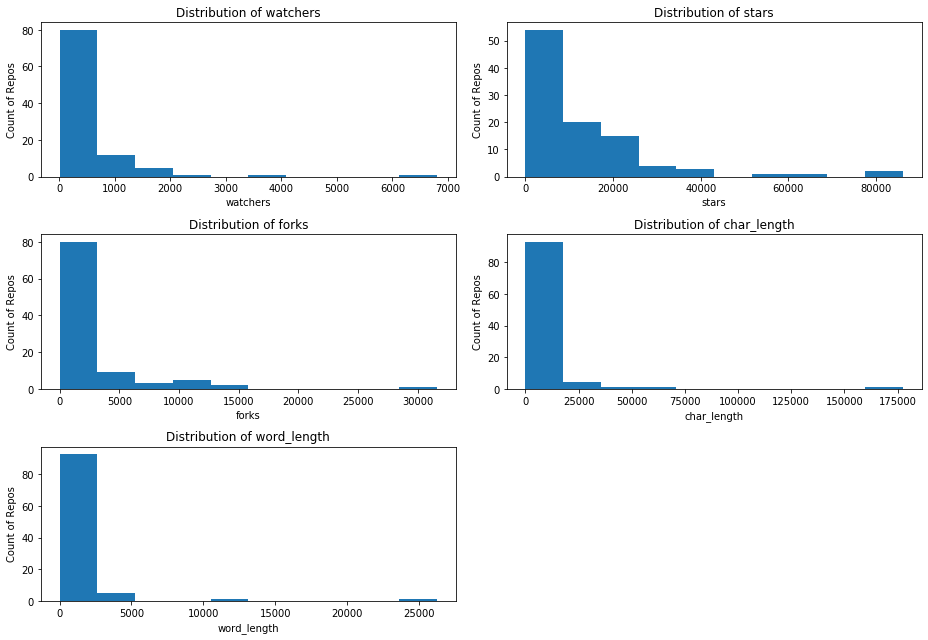

In [16]:
x = 1
plt.figure(figsize=(13,9))
for col in df.describe():
    
    plt.subplot(3,2,x)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count of Repos')
    plt.hist(df[col])
    x = x + 1
    
plt.tight_layout()

## Splitting the DF Into Train and Validate for Bivariate Analysis and Modeling
- Prepare Function Splits DF Into 68% Train, 32% Validate
    - 17 observations from each lanuage for Train
    - 8 observations from each language for Validate

In [17]:
train, validate = Prepare.train_validate(df)


train percent:  68.0 , validate percent:  32.0


In [18]:
train.language.value_counts()

java          18
javascript    18
swift         16
python        16
Name: language, dtype: int64

## Exploring Train DF Only
### Plotting Word Probability by Langauge

In [19]:
python_words = ' '.join(train[train.language == 'python'].filtered)
java_words = ' '.join(train[train.language == 'java'].filtered)
javascript_words = ' '.join(train[train.language == 'javascript'].filtered)
swift_words = ' '.join(train[train.language == 'swift'].filtered)
all_words = ' '.join(train.filtered)

In [20]:
python_words = re.sub(r'\s.\s', '', python_words)
java_words = re.sub(r'\s.\s', '', java_words)
javascript_words = re.sub(r'\s.\s', '', javascript_words)
swift_words = re.sub(r'\s.\s', '', swift_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [21]:
python_words_freq = pd.Series(python_words.split()).value_counts()
java_words_freq = pd.Series(java_words.split()).value_counts()
javascript_words_freq = pd.Series(javascript_words.split()).value_counts()
swift_words_freq = pd.Series(swift_words.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [22]:
word_count = (pd.concat([all_words_freq, python_words_freq, java_words_freq, javascript_words_freq, swift_words_freq], axis=1, sort=True)
              .set_axis(['all','python', 'java', 'javascript', 'swift'], axis=1, inplace=False)
              .fillna(0).apply(lambda s: s.astype(int)))

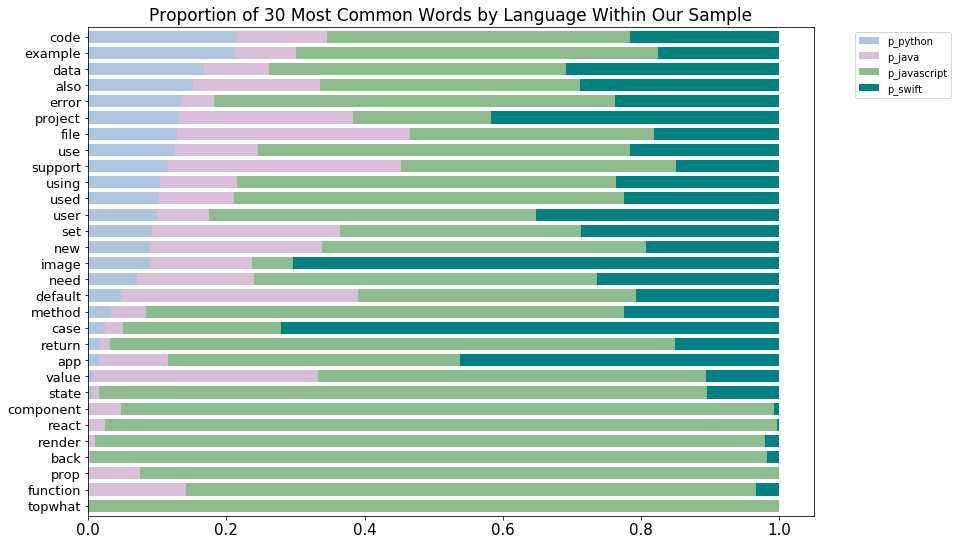

In [23]:
# lets plot the proportion of different languages amongst the top 50 occuring words

word_count.assign(p_python = word_count.python/word_count['all'],
                  p_java = word_count.java/word_count['all'],
                  p_javascript = word_count.javascript/word_count['all'],
                  p_swift = word_count.swift/word_count['all']).sort_values(by = 'all')[['p_python', 'p_java', 'p_javascript', 'p_swift']].tail(30).sort_values('p_python').plot.barh(width=.75,stacked = True, color={'darkseagreen','lightsteelblue','teal','thistle'}).legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.title('Proportion of 30 Most Common Words by Language Within Our Sample', size=17)
plt.yticks(size=13)
plt.xticks(size=15)
plt.savefig('word_prob.png')
plt.show()

### Plotting Single Word Clouds by Language

In [24]:
# creating word cloud for all of the different programming languages
python_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(python_words)
java_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(java_words)
javascript_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(javascript_words)
swift_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(swift_words)

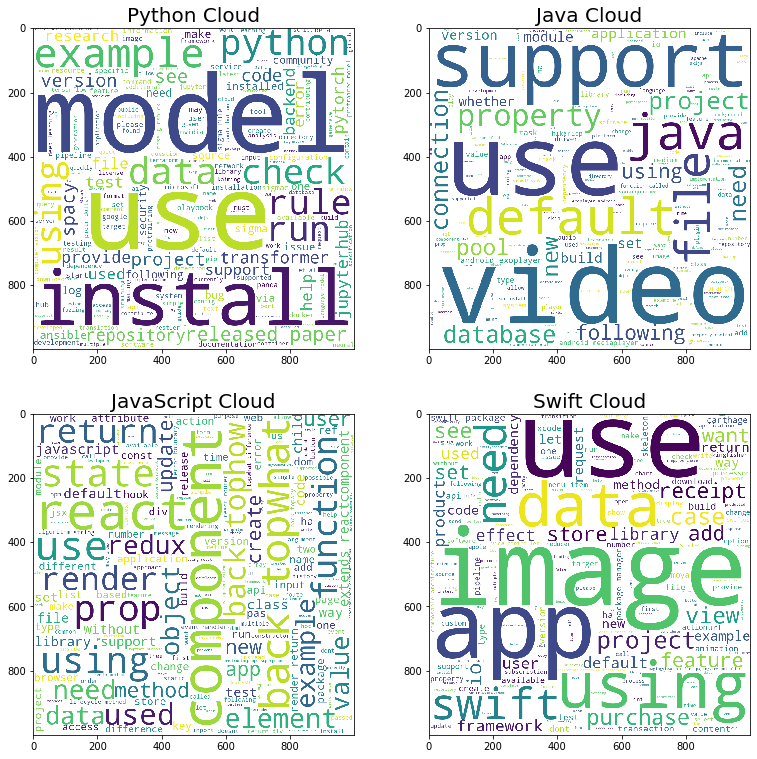

In [25]:
# plotting the word cloud
fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(python_cloud)
axes[0,0].set_title('Python Cloud', size=20)
axes[0,1].imshow(java_cloud)
axes[0,1].set_title('Java Cloud', size=20)
axes[1,0].imshow(javascript_cloud)
axes[1,0].set_title('JavaScript Cloud', size=20)
axes[1,1].imshow(swift_cloud)
axes[1,1].set_title('Swift Cloud', size=20)

plt.savefig('word_clouds.png')

### Plotting Word Cloud of Complete Train

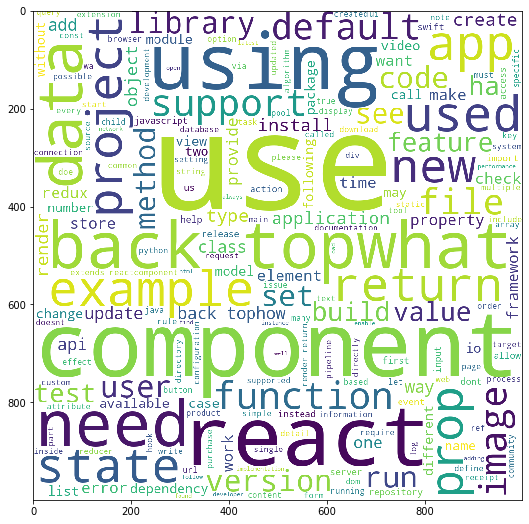

In [26]:
all_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(all_words)
plt.imshow(all_cloud)

### Plotting Bi-gram Word Clouds by Language

In [27]:
python_bigrams = pd.Series(list(nltk.ngrams(python_words.split(), 2))).value_counts().head(25)
java_bigrams = pd.Series(list(nltk.ngrams(java_words.split(), 2))).value_counts().head(25)
javascript_bigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 2))).value_counts().head(25)
swift_bigrams = pd.Series(list(nltk.ngrams(swift_words.split(), 2))).value_counts().head(25)

Text(0.5, 0, '# Occurances')

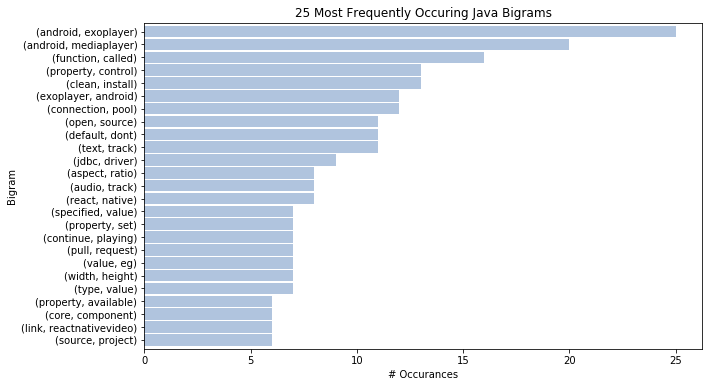

In [28]:
java_bigrams.sort_values().plot.barh(color='lightsteelblue', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

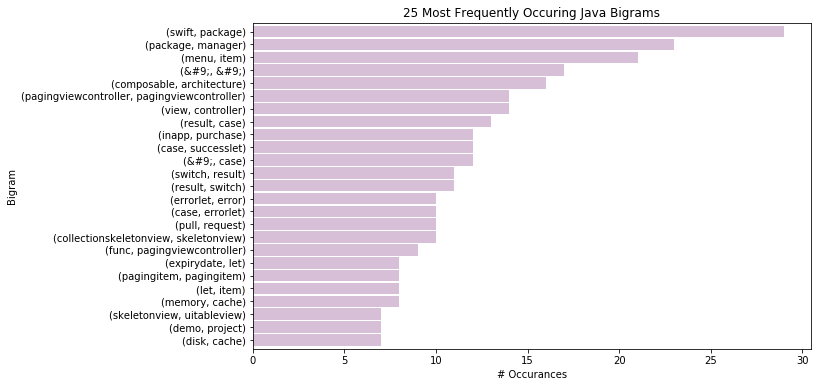

In [29]:
swift_bigrams.sort_values().plot.barh(color='thistle', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

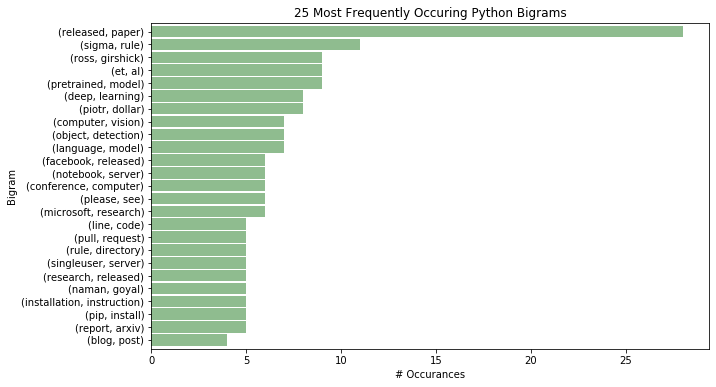

In [30]:
python_bigrams.sort_values().plot.barh(color='darkseagreen', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Python Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

Text(0.5, 0, '# Occurances')

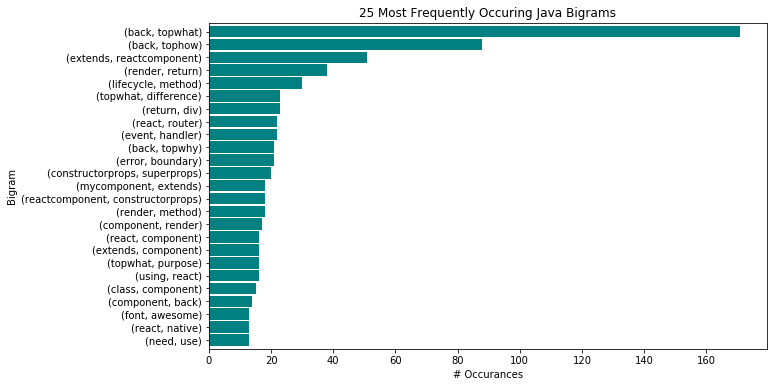

In [31]:
javascript_bigrams.sort_values().plot.barh(color='teal', width=.9, figsize=(10, 6))
    
plt.title('25 Most Frequently Occuring Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances') 

In [32]:
python_data = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
java_data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
javascript_data = {k[0] + ' ' + k[1]: v for k, v in javascript_bigrams.to_dict().items()}
swift_data = {k[0] + ' ' + k[1]: v for k, v in swift_bigrams.to_dict().items()}

In [33]:
# creating the bigram cloud
cloud_python = WordCloud(background_color = 'white', height = 1000, width = 1000)\
.generate_from_frequencies(python_data)

cloud_java = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(java_data)

cloud_javascript = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(javascript_data)

cloud_swift = WordCloud(background_color = 'white', height = 1000, width = 1000).\
generate_from_frequencies(swift_data)

Text(0.5, 1.0, 'Swift Cloud Bigrams')

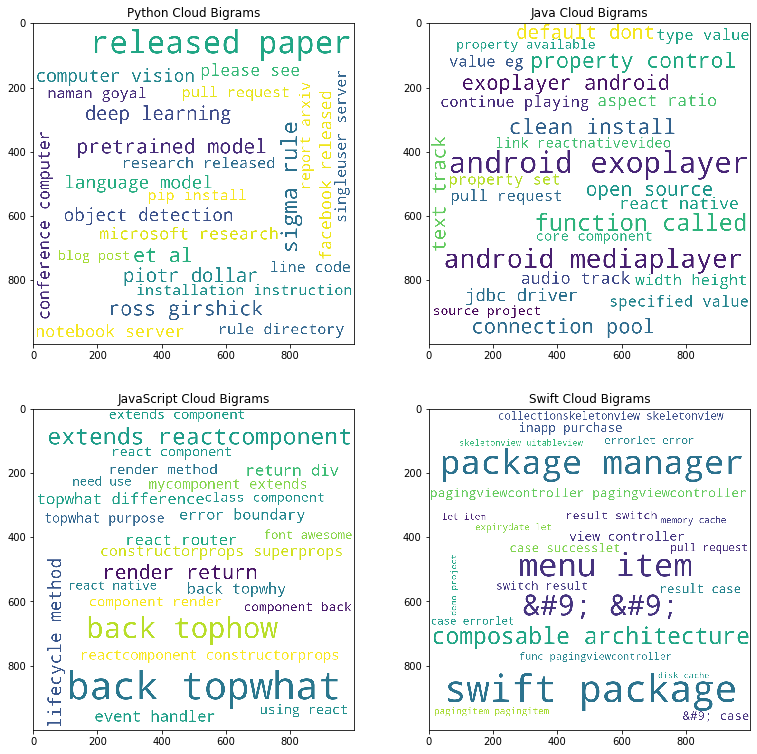

In [34]:
# plotting the bigram word cloud
fig, axes = plt.subplots(2,2, figsize = (13,13))
axes[0,0].imshow(cloud_python)
axes[0,0].set_title('Python Cloud Bigrams')
axes[0,1].imshow(cloud_java)
axes[0,1].set_title('Java Cloud Bigrams')
axes[1,0].imshow(cloud_javascript)
axes[1,0].set_title('JavaScript Cloud Bigrams')
axes[1,1].imshow(cloud_swift)
axes[1,1].set_title('Swift Cloud Bigrams')

### Plotting Frequency of Bigrams by Language

### Do any features correlate with Word_Length?
- not including word_length and char_length, which are derived from the same feature
- what if we control for language?

Text(0.5, 1, 'Correlation Heatmap for All Observations')

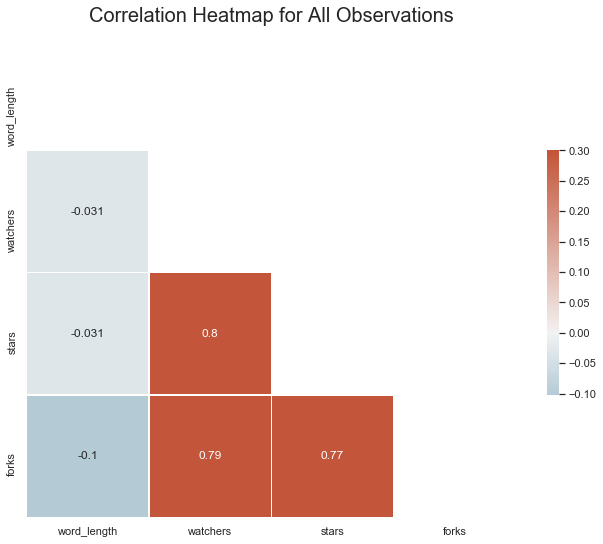

In [35]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = (train[['language','word_length','watchers','stars','forks']].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap for All Observations', size = 20)

### Heatmap by Language

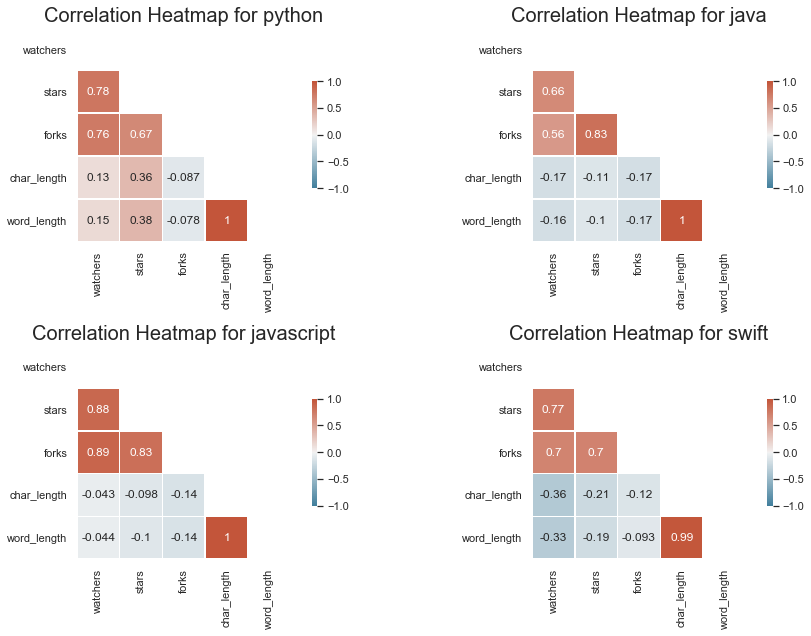

In [36]:
sns.set_theme(style="white")

y = 1

for x in ['python','java','javascript','swift']:
    
    plt.subplot(2,2,y)
    
    # Compute the correlation matrix
    corr = (train[train[['language','word_length','watchers','stars','forks']].language == x].corr())

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title(f'Correlation Heatmap for {x}', size = 20)
    
    y+=1
    
plt.tight_layout()

plt.savefig('language_corr.png')

### Exploring Document Length by Language

Text(0.5, 1.0, 'Distribution of Word Length by Language')

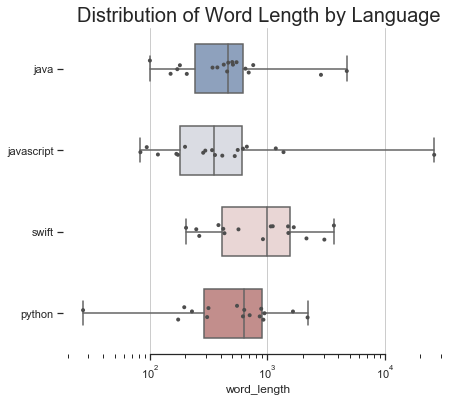

In [37]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="word_length", y="language", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="word_length", y="language", data=train,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title('Distribution of Word Length by Language', size=20)

### Do Stars, Watchers, and Forks Significantly Vary by Language?

<Figure size 2160x1080 with 0 Axes>

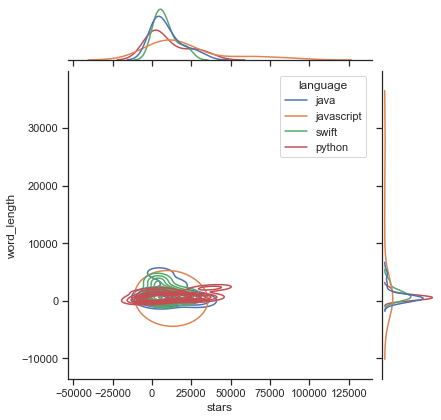

In [38]:
sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="stars", y="word_length", hue="language",
    kind="kde",
)


<Figure size 2160x1080 with 0 Axes>

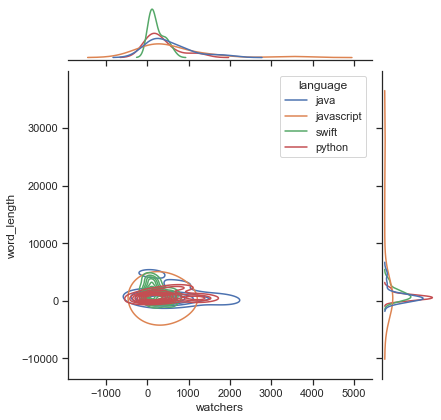

In [39]:
sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="watchers", y="word_length", hue="language",
    kind="kde",
)

<Figure size 2160x1080 with 0 Axes>

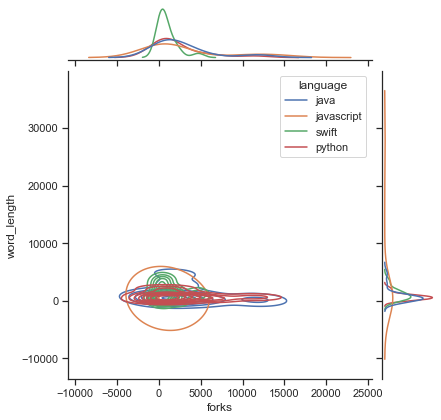

In [40]:
sns.set_theme(style="ticks")

plt.figure(figsize=(30,15))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=train,
    x="forks", y="word_length", hue="language",
    kind="kde",
)

### Takeaways
Conclusions:  
Next Steps:

##### [Back to Top](#top)

# Modeling <a class="anchor" id="fourth-bullet"></a>

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

import nltk  
import random  
import string
import bs4 as bs  
import urllib.request  
import re  

In [42]:
# nltk.download('punkt')

## Bag of Words
https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/

In [43]:
corpus = df.tokenized

In [44]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [45]:
# wordfreq

In [46]:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [47]:
sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [52]:
X = np.asarray(sentence_vectors)

In [53]:
len(sentence_vectors)

100

In [54]:
y = df.language

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [56]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

In [57]:
lm = LogisticRegression().fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 100.00%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java          20           0       0      0
javascript     0          20       0      0
python         0           0      20      0
swift          0           0       0     20
---
              precision    recall  f1-score   support

        java       1.00      1.00      1.00        20
  javascript       1.00      1.00      1.00        20
      python       1.00      1.00      1.00        20
       swift       1.00      1.00      1.00        20

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Evaluating on Validate (X_train)

In [60]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 65.00%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java           3           3       0      0
javascript     0           2       1      0
python         2           0       4      1
swift          0           0       0      4
---
              precision    recall  f1-score   support

        java       0.50      0.60      0.55         5
  javascript       0.67      0.40      0.50         5
      python       0.57      0.80      0.67         5
       swift       1.00      0.80      0.89         5

    accuracy                           0.65        20
   macro avg       0.68      0.65      0.65        20
weighted avg       0.68      0.65      0.65        20



## Feature Extraction: TF-IDF
- TF: Term Frequency; how often a word appears in a document.
- IDF: Inverse Documnet Frequency; a measure based on in how many documents will a word appear.
- TF-IDF: A combination of the two measures above.


## TF_iDF Modeling
- create term frequency on whole df
- split into train and test for X and y
- predict on train
- predict on test
- evaluate

In [61]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.filtered)
y = df.language

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [63]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

In [64]:
lm = LogisticRegression().fit(X_train, y_train)

In [65]:
train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [66]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 100.00%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java          20           0       0      0
javascript     0          20       0      0
python         0           0      20      0
swift          0           0       0     20
---
              precision    recall  f1-score   support

        java       1.00      1.00      1.00        20
  javascript       1.00      1.00      1.00        20
      python       1.00      1.00      1.00        20
       swift       1.00      1.00      1.00        20

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Evaluating on Validate (X_test)

In [67]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 70.00%
---
Confusion Matrix
actual      java  javascript  python  swift
predicted                                  
java           3           0       0      0
javascript     1           3       1      1
python         1           2       4      0
swift          0           0       0      4
---
              precision    recall  f1-score   support

        java       1.00      0.60      0.75         5
  javascript       0.50      0.60      0.55         5
      python       0.57      0.80      0.67         5
       swift       1.00      0.80      0.89         5

    accuracy                           0.70        20
   macro avg       0.77      0.70      0.71        20
weighted avg       0.77      0.70      0.71        20



## Term Frequency (TF)
Term frequency can be calculated in a number of ways, all of which reflect how frequently a word appears in a document.

- Raw Count: This is simply the count of the number of occurances of each word.
- Frequency: The number of times each word appears divided by the total number of words.
- Augmented Frequency: The frequency of each word divided by the maximum frequency. This can help prevent bias towards larger documents.  

Would another way increase performance on validate?

### Takeaways
Conclusions:  
Next Steps:

##### [Back to Top](#top)

# Final Conclusions <a class="anchor" id="fifth-bullet"></a>

##### [Back to Top](#top)